In [1]:
import pandas as pd

data = pd.read_csv("clean_weather.csv", index_col=0)
data = data.ffill()

data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [2]:
data.shape[1]

4

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

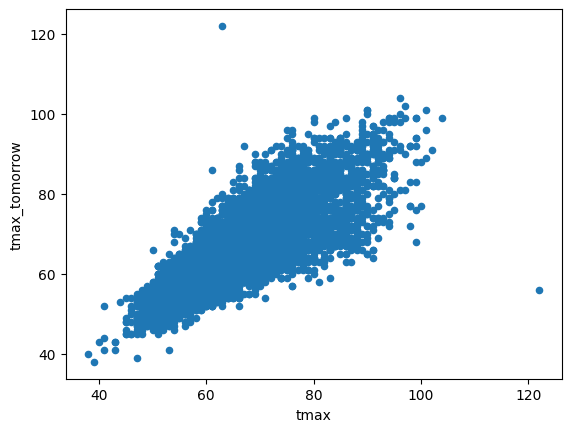

In [3]:
data.plot.scatter("tmax", "tmax_tomorrow")

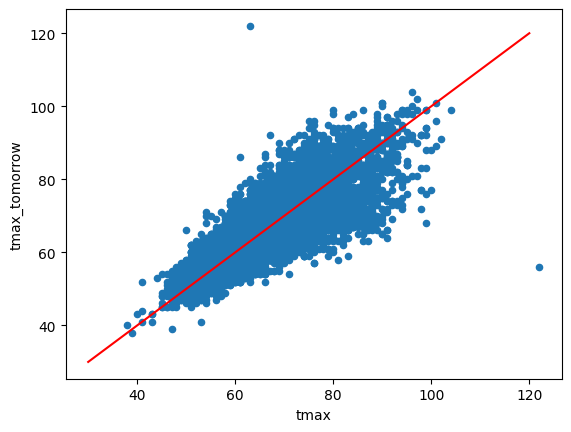

In [4]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([30,120],[30,120], 'red')

In [5]:
data

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0
2022-11-25,70.0,39.0,0.0,62.0


In [6]:
import numpy as np
PREDICTORS = ["tmax", "tmin","rain"]
TARGET = "tmax_tomorrow"

np.random.seed(0)
split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x,train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]


In [7]:
import math

def init_params(predictors):
    np.random.seed(0)
    weights = np.random.rand(predictors, 1)
    biases = np.ones((1,1))
    return [weights, biases]

In [8]:
init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [9]:
def forward(params, x):
    weights, biases = params
    prediction = x @ weights + biases
    return prediction

In [10]:
def mse(actual, predicted):
    return np.mean((actual-predicted) ** 2)

def mse_grad(actual, predicted):
    return predicted - actual

In [11]:
def backward(params, x, lr, grad):
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [12]:
lr = 1e-4
epochs = 1000000

params = init_params(train_x.shape[1])

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    if i % 100000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} loss: {valid_loss}")

Epoch 0 loss: 31.564020597420274
Epoch 100000 loss: 22.334538322879986
Epoch 200000 loss: 22.091830904025493
Epoch 300000 loss: 21.90086363406021
Epoch 400000 loss: 21.7495164452107
Epoch 500000 loss: 21.628818306812136
Epoch 600000 loss: 21.532024522869786
Epoch 700000 loss: 21.454001309402106
Epoch 800000 loss: 21.39080287641205
Epoch 900000 loss: 21.339372947459434


In [13]:
params

[array([[ 0.73472903],
        [ 0.20396443],
        [-1.62813009]]),
 array([[7.09116813]])]

In [14]:
print(f"Param 1: {params[0][0]}")
print(f"Param 2: {params[0][1]}")
print(f"Param 3: {params[0][2]}")
print(f"Bias: {params[1][0]}")

Param 1: [0.73472903]
Param 2: [0.20396443]
Param 3: [-1.62813009]
Bias: [7.09116813]


In [15]:
test_y

array([[68.],
       [67.],
       [67.],
       ...,
       [70.],
       [62.],
       [64.]])

In [16]:
new_predictions = forward(params, test_x)

In [17]:
new_predictions

array([[66.59736354],
       [68.0668216 ],
       [67.33209257],
       ...,
       [63.94582594],
       [66.47681321],
       [61.00690981]])

In [18]:
from sklearn.metrics import precision_score

new_predictions = new_predictions.round()

In [19]:
new_predictions

array([[67.],
       [68.],
       [67.],
       ...,
       [64.],
       [66.],
       [61.]])

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(test_y, new_predictions)
print("R-squared:", r2)

R-squared: 0.6763452148780562


In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [29]:
lr_model.fit(train_x, train_y)

LinearRegression()

In [30]:
lr_model.intercept_

array([9.53979018])

In [31]:
lr_model.coef_

array([[ 0.71161936,  0.18644815, -2.18382429]])